# Physics 404/604

## Computational Physics (Spring 2018)

## BPB-250, Mon./Wed. 2:30-3:45 pm

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |

# Nonlinear Population Dynamics

Bug population dynamics.
\begin{equation}
x_{i+1}=\mu x_{i}(1-x_{i})
\end{equation}

In [1]:
from vpython import *

scene = canvas() # with this you don't need to restart kernel each time

f1 = gcurve(color=color.cyan)	# a graphics curve
for x in arange(0, 8.05, 1.):	# x goes from 0 to 8
    f1.plot(pos=(x,5*cos(2*x)*exp(-0.2*x)))	# plot

f2 = gdots(color=color.red)	# a graphics curve
for x in arange(0, 8.05, 1.):	# x goes from 0 to 8
    f2.plot(pos=(x,5*cos(2*x)*exp(-0.2*x)))	# plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
from vpython import *

scene = canvas() # with this you don't need to restart kernel each time
#f2 = gcurve(color=color.cyan)	# a graphics curve
f2 = gdots(color=color.red)	# a graphics curve

iend=2000
xi=0.75
mu=-1.
for i in range(iend):	# x goes from 0 to 8
    xi=mu*xi*(1-xi)
    f2.plot(pos=(i,xi))	# plot


<IPython.core.display.Javascript object>

Stable Populations: 

We want to see if the model can produce a stable population, that is, one that remains the same from generation to generation.

* Calculate and plot  x$_{i+1}$
  as a function of the generation number  i

* The initial population  x0
  is called the seed, and we suggest  x0=0.75
  as a good starting value (the dynamical effects are not sensitive to the seed).
Your results should be highly sensitive to the value for the growth rate $\mu$
 . Too large a value may lead to instabilities, while too small a value may lead to extinction. To make sure that the model is behaving reasonably, try some cases for which we can be fairly sure of what the results should be. By trying some negative and zero values for  $\mu$
  (for example, -1, -0.75, -0.5, -0.25, 0) we should obtain decaying populations.

* Now that you have some confidence in the model, see if you can increase the population to some stable values. With the same initial population as before, try  $\mu$
  = 0, 0.5, 1.0, 1.5, 2. Make plots of  x$_i$
  versus  i
  for each of these cases.

* Take note of the transient behavior in these plots that occur for early generations before a steady state or more regular behavior sets in. In general, these are not the long-term dynamical behaviors of interest.

* For a fixed value of  $\mu$
 , try different values for the seed population  x0
 . Verify that differing values of  x0
  do affect the transients, but not the values of the stable populations.
  

 
* Confirm Feigenbaum’s observations of the different patterns shown in Figures 14.1 and 14.2 that occur for  $\mu$=(0.4,2.4,3.2,3.6,3.8304)
  and seed  x0=0.75
 . 
 
* Identify the following in your graphs:

* Transients: Irregular behaviors before reaching a steady state that differ for different seeds.

* Asymptotes: In some cases the steady state is reached after only 20 generations, while for larger $\mu$
  values, hundreds of generations may be needed. These steady-state populations are independent of the seed.

* Extinction: If the growth rate is too low,  $\mu\leq$1
 , the population dies off.
 
* Stable states: The stable single-population states attained for  $\mu$<3
  should agree with the prediction.

* Multiple cycles: Examine the map orbits for a growth parameter $\mu$
  increasing continuously through 3. Observe how the system continues to double periods as $\mu$
  increases. To illustrate, in Figure 14.2C with  $\mu$=3.5
 , we notice a steady state in which the population alternates among four attractors (a four-cycle).

* Intermittency: Observe simulations for  3.8264<$\mu$<3.8304
 . Here the system appears stable for a finite number of generations and then jumps all around, only to become stable again.

* Chaos: We define chaos as the deterministic behavior of a system displaying no discernible regularity. This may seem contradictory; if a system is deterministic, it must have step-to-step correlations (which, when added up, mean long-range correlations); but if it is chaotic, the complexity of the behavior may hide the simplicity within. In an operational sense, a chaotic system is one with an extremely high sensitivity to parameters or initial conditions. This sensitivity to even minuscule changes is so high that it is impossible to predict the long-range behavior unless the parameters are known to infinite precision (a physical impossibility).

* The system’s behavior in the chaotic region is critically dependent on the exact values of $\mu$
  and  x0
 . Systems starting out with nearly identical values for $\mu$
  and  x0
  may end up with quite different behaviors. In some cases the complicated behaviors of nonlinear systems will be chaotic, but this is not the same as being random.
  
* Compare the long-term behaviors of starting with the two essentially identical seeds  x0=0.75
  and  x0=0.75(1+$\epsilon$)
 , where  $\epsilon$$\sim$10$^{−10}$ and $\mu$=4
 .
 
* Repeat the simulation with  x0=0.75
  and two essentially identical survival parameters,  $\mu$=4.0
  and  μ′=4.0(1−$\epsilon$)
 , where  $\epsilon$$\sim$10$^{−10}$
 . Both simulations should start off the same but eventually diverge.

## Bifurcation Diagram

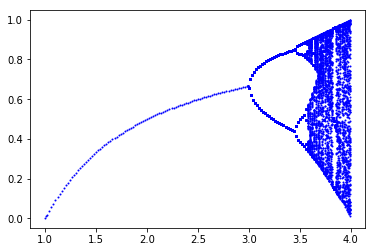

In [3]:

# Bugs.py, Noitebook Version, Logistic map

from IPython.display import IFrame
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

m_min = 1.0
m_max = 4.0
step = 0.01
lasty = int(1000 * 0.5)              # to eliminate later some points
count = 0                            # to plot later every two iterations
for m in arange(m_min, m_max, step):
    y = 0.5
    for i in range(1,201,1):         #to avoid transients
        y = m*y*(1-y)   
    for i in range(201,402,1):
        y = m*y*(1- y) 
    for i in range(201, 402, 1):     # to avoid transients
        oldy=int(1000*y)
        y = m*y*(1-y)   
        inty = int(1000 * y)
        if  inty != lasty and count%2 == 0:
            plt.plot(m,y,'bo',markersize=1)      # to avoid repeats
        lasty = inty
        count   += 1

plt.show()

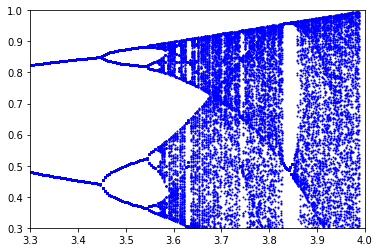

In [72]:

# Bugs.py, Noitebook Version, Logistic map

from IPython.display import IFrame
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

m_min = 3.3
m_max = 3.99
step = (m_max-m_min)/300.
lasty = int(1000 * 0.5)              # to eliminate later some points
count = 0                            # to plot later every two iterations
for m in arange(m_min, m_max, step):
    y = 0.5
    for i in range(1,201,1):         #to avoid transients
        y = m*y*(1-y)   
    for i in range(201,402,1):
        y = m*y*(1- y) 
    for i in range(201, 402, 1):     # to avoid transients
        oldy=int(1000*y)
        y = m*y*(1-y)   
        inty = int(1000 * y)
        if  inty != lasty and count%2 == 0:
            plt.plot(m,y,'bo',markersize=1)      # to avoid repeats
        lasty = inty
        count   += 1

plt.xlim(3.3,4.0)
plt.ylim(0.3,1.0)
plt.show()

* Look over the series of bifurcations occurring at
$\mu_{k}\sim$3,3.449,3.544,3.5644,3.5688,3.569692,3.56989,….
The end of this series is a region of chaotic behavior.

* A close examination of Figure 14.3 shows regions where, for a slight increase in $\mu$
 , a very large number of populations suddenly change to very few populations. Whereas these may appear to be artifacts of the video display, this is a real effect and these regions are called windows. Check that at  $\mu$=3.828427
  chaos moves into a three-cycle population.
  
This is called Feigenbaum Constants
\begin{equation}
\mu_{k}->\mu_{\infty}-\frac{c}{\delta^k}
\end{equation}
$\mu_{\infty}\sim 3.56995$, $c\sim2.637$, $\delta\sim4.6692$

## Signals of Chaos: Lyapunov Coefficient & Shannon Entropy

Suppose we purturbe the starting position at time $t$ near an attractor. If the distance grows exponentially, it is chaotic. 

For 1-D map $x_{n+1}=f(x_{n})$, let's only look at one iteration
\begin{equation}
x_{0}'=x_{0}+\delta x_{0},\quad x_{1}'=x_{1}+\delta x_{1}
\end{equation}
With Taylor series around $x_{0}$, we have
\begin{equation}
x_{1}+\delta x_{1}=f(x_{0}+\delta x_{0})\sim f(x_{0})+\frac{\partial f}{\partial x}|_{x_{0}}\delta x_{0}=x_{1}+\frac{\partial f}{\partial x}|_{x_{0}}\delta x_{0}
\end{equation}
So $\delta x_{1}\sim(\frac{\partial f}{\partial x})_{x_{0}}\delta x_{0}$.

After n steps:
\begin{equation}
|\delta x_n| =L^n |\delta x_0|,\quad L^n =\prod_{i=0}^{n-1}\left|\left(\frac{\delta f}{\delta x}\right)_{x_{i}}\right|
\end{equation}

The L is called the Lyapunov number, and the Lyapunov coefficient is :
\begin{equation}
\lambda=ln(L)=lim_{n->\infty}\frac{1}{n}\sum_{i=0}^{n-1}ln\left|\left(\frac{\delta f}{\delta x}\right)_{x_{i}}\right|
\end{equation}

For our problem, we have
\begin{equation}
\lambda=\frac{1}{n}\sum_{i=0}^{n-1}ln\left|\mu-2\mu x_{i}\right|
\end{equation}

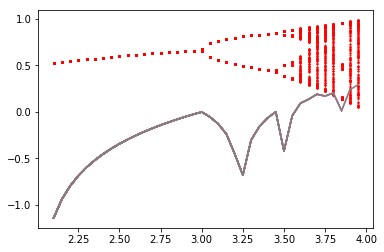

In [23]:

# LyapLog.py, Notebook Version, Lyapunov coef for logistic map

from IPython.display import IFrame
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

m_min = 2.1
m_max = 4.0
step = 0.05
yy=[]
xx=[]

for m in arange(m_min, m_max, step):                                         # m loop
    y = 0.5
    suma = 0.0
    for i in range(1, 401, 1):   
        y = m*y*(1 - y)     # Skip transients     
    for i in range(402, 601, 1):
        y = m*y*(1 - y)
        plt.plot(m, y ,'ro',markersize=1)
        suma = suma  +  log(abs(m*(1. - 2.*y) ))     # Lyapunov
    suma=suma/401
    xx=xx+[m]
    yy=yy+[suma]
    plt.plot(xx, yy)                    # Normalize
    
plt.show() 

Shannon entropy, like the Lyapunov exponent, is used an indicator of chaos.Entropy is a measure of uncertainty (garbled signal) that has proven useful in communication theory. Imagine that an experiment has  N
  possible outcomes. If the probability of each is  $p_1$,$p_2$,…,$p_N$
 , with normalization such that  $\sum p_{i}=1$
 , then the Shannon entropy is defined as
\begin{equation}
S_{Shannon}=-\sum_{i=1}^{N}p_{i}ln p_{i}
\end{equation}

waiting until mu=4 before plotting  2.7
waiting until mu=4 before plotting  2.705
waiting until mu=4 before plotting  2.71
waiting until mu=4 before plotting  2.715
waiting until mu=4 before plotting  2.7199999999999998
waiting until mu=4 before plotting  2.7249999999999996
waiting until mu=4 before plotting  2.7299999999999995
waiting until mu=4 before plotting  2.7349999999999994
waiting until mu=4 before plotting  2.7399999999999993
waiting until mu=4 before plotting  2.744999999999999
waiting until mu=4 before plotting  2.749999999999999
waiting until mu=4 before plotting  2.754999999999999
waiting until mu=4 before plotting  2.759999999999999
waiting until mu=4 before plotting  2.764999999999999
waiting until mu=4 before plotting  2.7699999999999987
waiting until mu=4 before plotting  2.7749999999999986
waiting until mu=4 before plotting  2.7799999999999985
waiting until mu=4 before plotting  2.7849999999999984
waiting until mu=4 before plotting  2.7899999999999983
waiting until m

waiting until mu=4 before plotting  3.454999999999984
waiting until mu=4 before plotting  3.459999999999984
waiting until mu=4 before plotting  3.464999999999984
waiting until mu=4 before plotting  3.4699999999999838
waiting until mu=4 before plotting  3.4749999999999837
waiting until mu=4 before plotting  3.4799999999999836
waiting until mu=4 before plotting  3.4849999999999834
waiting until mu=4 before plotting  3.4899999999999833
waiting until mu=4 before plotting  3.4949999999999832
waiting until mu=4 before plotting  3.499999999999983
waiting until mu=4 before plotting  3.504999999999983
waiting until mu=4 before plotting  3.509999999999983
waiting until mu=4 before plotting  3.514999999999983
waiting until mu=4 before plotting  3.5199999999999827
waiting until mu=4 before plotting  3.5249999999999826
waiting until mu=4 before plotting  3.5299999999999825
waiting until mu=4 before plotting  3.5349999999999824
waiting until mu=4 before plotting  3.5399999999999823
waiting until mu=

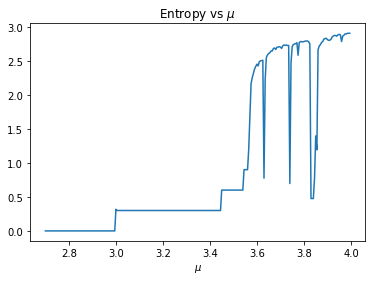

In [17]:

# Entropy.py, Notebook Version, Shannon Entropy for Logistic map

from IPython.display import IFrame
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

mumin = 2.7
mumax = 4.0
dmu = 0.005
nbin = 1000
nstart=30000
nmax = 100000
prob = zeros( (1000), float)                
xx=[]
yy=[]
# first coord. mu0, entr0
for mu in arange(mumin, mumax, dmu):                                        # mu loop
    print("waiting until mu=4 before plotting ",mu)
    for j in range(1, nbin):
        prob[j] = 0
    y  = 0.5
    for n in range(1, nmax + 1):
        y = mu*y*(1.0 - y) # Logistic map, Skip transients
        if (n > nstart):
            ibin = int(y*nbin)  +  1
            prob[ibin]  +=  1
    entropy = 0.
    for ibin in range(1, nbin):
        if (prob[ibin]>0):
            entropy = entropy - (prob[ibin]/(nmax-nstart))*math.log10(prob[ibin]/(nmax-nstart))
    yy=yy+[entropy]    
    xx=xx+[mu]
        
plt.plot(xx,yy) 
print(prob,nmax)
plt.title("Entropy vs $\mu$")
plt.xlabel('$\mu$')
plt.show()     

In [27]:
print(-1*np.log10(1.),-2.*0.5*np.log10(0.5),-1000.*0.001*np.log10(0.001))

-0.0 0.3010299956639812 3.0
